<a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/01.01.Getting_Started_ODC_and_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="top"></a>
# Getting Started: Open Data Cube on Google Colab

1.   [Open Data Cube Framework](#ODC-Framework)
2.   [Google Colab and Jupyter Notebooks](#what-is)
3.   [Products and Measurements](#products-measurements)
4.   [How to Load Data](#How-to-Load-Data)
5.   [Explore More Applications](#explore-applications)
6.   [Reference Links](#reference-links)

*The article below provides an overview of ODC on Google Colab. If you wish to run the notebooks, you'll need to setup a Google Earth Engine account. This is free, and you can read more about how to do that [here](https://www.openearthalliance.org/sandbox).*

<a name="ODC-Framework"></a>
# 1. Open Data Cube Framework

The Open Data Cube (ODC, [opendatacube.org](https://www.opendatacube.org/)) is a software framework with the objective of:

> ... increasing the impact of satellite data by providing an open and freely accessible exploitation tool, and to foster a community to develop, sustain, and grow the breadth and depth of applications.

An ODC instance is made up of data, a mechanism to index that data (e.g. database), and an open source Python code base making use of a wide variety of Python libraries. A more detailed introduction and some history of the ODC can be found [here](https://medium.com/opendatacube/what-is-open-data-cube-805af60820d7).







![ODC framework](https://miro.medium.com/max/700/1*2XgL8GGYEvDcOpiqZaWJ7Q.png)

The ODC framework can run on a wide variety of infrastructure from a simple Docker instance running on a laptop computer scaling up to continential coverage (e.g. [Digital Earth Afica](https://www.digitalearthafrica.org/)). This notebook is intended to give you an introduction to the ODC running on the Google Colab plaform, and utalising data from the [Google Earth Engine Catalog](https://developers.google.com/earth-engine/datasets).

The notebook provides:

*   A quick introduction to Jupyter notebooks and the Colab environment (with links to read more)
*   A worked example of how to configure an ODC connection from Google Colab
*   An example listing of the products and measurements available
*   How to load some sample data
*   Links to worked examples demonstrating several Earth observation applications

This is intended as a familarisation and training resource, and we hope it will help start your journey with ODC!

[Back to the top](#top)

<a name="what-is"></a>
# 2. Google Colab and Jupyter Notebooks

Google Colaboratory (or Google Colab, [colab.research.google.com](https://colab.research.google.com)) is an environment that allows anybody to write and execute arbitrary Python code through the browser, and is especially well suited to machine learning, data analysis and education. Colab is a hosted Jupyter Notebook service, where 'Notebooks' (like this one) containing live code, equations, visualizations and narrative text can be shared. You can read more about these environments in the [reference links below](#reference-links).

While Jupyter notebooks are relatively intuitive, if you don't understand what the code and cells below are, then a quick read of the [features overview](https://colab.research.google.com/notebooks/basic_features_overview.ipynb) should help get you strated.

Loading the satellite datasets used by this notebook requires a [Google Earth Engine](https://earthengine.google.com/) account. These accounts are free to setup, and the steps required are described [here](https://www.openearthalliance.org/sandbox).

***Finally, one important note. This is a sandbox environment. Feel free to experiment! From time to time, you might see errors. That's OK - you can't break anything in here. And you can always start anew by [reloading the Notebook](https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/01.01.Getting_Started_ODC_and_Colab.ipynb). If you have questions, [try the Open Earth Alliance Forum](https://www.openearthalliance.org/forum).***

Now, onto the code...! First, a quick test: try running this cell. (If you're not sure how, [try this](https://colab.research.google.com/notebooks/basic_features_overview.ipynb).)

In [1]:
print('Push [shift] + [enter] to run this cell - now you are ready to Go!')

Push [shift] + [enter] to run this cell - now you are ready to Go!


Having run the cell above, you will have initialised your Google Colab environment, and are now ready to setup your ODC instance.

The next code block provides Colab with access to your Google Drive to store content and results. *It will ask you to click on an authentication link, and then paste an authentication code back into the notebook cell.* The steps for the process are shown below:

<img src="https://ceos.org/document_management/SEO/ODC%20Colab%20Images/Google%20Drive%20Auth%20Info.png" width="100%">


In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Now that you've setup the link to Google Drive, the next cell will grab the Python libraries necessary to run ODC on Google Colab. This is based on the [ODC-Colab](https://github.com/ceos-seo/odc-colab) repository build by the CEOS Systems Engineering Office.

In [ ]:
!wget -nc https://raw.githubusercontent.com/ceos-seo/odc-colab/master/odc_colab.py
from odc_colab import odc_colab_init
odc_colab_init(install_odc_gee=True)

The next code block will populate the ODC data index allowing ODC to access data from the [Google Earth Engine Catalog](https://developers.google.com/earth-engine/datasets).

In [ ]:
from odc_colab import populate_db
populate_db()

This next code block will establish the connection to the Google Earth Engine datasets. *As above, it will ask you to click on an authentication link, and then paste an authentication code back into the notebook cell.* The steps for the process are shown below:

<img src="https://ceos.org/document_management/SEO/ODC%20Colab%20Images/GEE%20Auth%20Info.png" width="100%">

Following that, the block loads a couple of key Python librarires used later in the Notebook.

In [ ]:
# Suppress Warning Messages
import warnings
warnings.filterwarnings('ignore')

# Load Data Cube Configuration
from odc_gee import earthengine
dc = earthengine.Datacube(app='Getting_Started_loading_data')

# Import Data Cube API
import utils.data_cube_utilities.data_access_api as dc_api  
api = dc_api.DataAccessApi()

# Import Utilities
import xarray as xr

Now we have an ODC instance established with a connection to data!

[Back to the top](#top)

<a name="products-measurements"></a>
# 3. Products and Measurements

Within this ODC instance, 'products' refer to satellites (platform), and their instruments. To see what products are available, you can run the following command.

In [6]:
products = dc.list_products()

display_columns = ["name",
                   "description",
                   "platform",
                   "instrument",
                   "crs",
                   "resolution"]

products[display_columns].sort_index()

,name,description,platform,instrument,crs,resolution
id,,,,,,
1,ls8_google,<p>This dataset is the atmospherically correct...,LANDSAT_8,OLI/TIRS,EPSG:4326,"(-0.000269493352, 0.000269493352)"
2,s1_google,<p>The Sentinel-1 mission provides data from a...,Sentinel-1A,C-SAR,EPSG:4326,"(-8.98311175e-05, 8.98311175e-05)"
3,s2_google,"<p>Sentinel-2 is a wide-swath, high-resolution...",Sentinel-2A,MSI,EPSG:4326,"(-8.98311175e-05, 8.98311175e-05)"
4,ls7_google,<p>This dataset is the atmospherically\ncorrec...,LANDSAT_7,ETM,EPSG:4326,"(-0.000269493352, 0.000269493352)"
5,viirs_google,<p>Monthly average radiance composite images u...,VIIRS,DNB,EPSG:4326,"(-0.00416666667, 0.00416666667)"


For each of the products available, there are a number of measurements available. These measurements correspond to the various 'bands' collected by the satellite instrument. In some cases, these are radar bands, or other derived layers such as a cloud mask.

You can see a list of measurements by running the command below. Have a play to try different products (from the code block above), but note that the example below is set to run using the Landsat product `ls8_google`.

In [7]:
product = "ls8_google"

measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition
measurement,,,,,,
B1,B1,int16,,-9999.0,"[ultra_blue, band_1, b1]",NaN
B2,B2,int16,,-9999.0,"[blue, band_2, b2]",NaN
B3,B3,int16,,-9999.0,"[green, band_3, b3]",NaN
B4,B4,int16,,-9999.0,"[red, band_4, b4]",NaN
B5,B5,int16,,-9999.0,"[nir, band_5, b5]",NaN
B6,B6,int16,,-9999.0,"[swir1, band_6, b6]",NaN
B7,B7,int16,,-9999.0,"[swir2, band_7, b7]",NaN
B10,B10,int16,Kelvin,-9999.0,"[tirs1, band_10_brightness_temperature, b10]",NaN
B11,B11,int16,Kelvin,-9999.0,"[tirs2, band_11_brightness_temperature, b11]",NaN


[Back to the top](#top)

<a name="How-to-Load-Data"></a>
# 4. How to Load Data

Now that you are familar with the basics of ODC and Colab, let's try loading some data and plotting an image. 

Loading data requires the use of the `dc.load()` function from the [datacube documentation](https://datacube-core.readthedocs.io/en/latest/dev/api/generate/datacube.Datacube.load.html). Below we give an example of how to use this function, using the Landsat-8 product `ls8_google`. You can also use other products from the table you generated above.

In [8]:
# Define the Product and Platform
# This data is indexed from Google Earth Engine data sources

product = "ls8_google"
platform = "LANDSAT_8"

We now need to choose where on Earth we want to look and when. Be careful of the box size and time range you choose - the more data, the longer the code will take to run! We found that the following parameters give output within a couple of minutes. 

The analysis region should be given by a tuple of latitudes and a tuple of longnitudes that specify the sides of the region. Below we calculate the box sides by specifying a box centre and size (in degrees). 

Below we load data for the city of Mombasa, Kenya for all of 2020, by specifying a box centre and size.

<a name="change_lat_lon"></a>

In [9]:
# MODIFY HERE
# Select an analysis region (Latitude-Longitude). Values should be defined from MIN to MAX (left to right)

# Specify box centre and box size in degrees.
# Example: Mombasa, Kenya
lat_long = (-4.025, 39.625)
box_size_deg = 0.125
latitude = (lat_long[0]-box_size_deg/2, lat_long[0]+box_size_deg/2)
longitude = (lat_long[1]-box_size_deg/2, lat_long[1]+box_size_deg/2)

print('Latitude corners: ' + str(latitude))
print('Longitude corners: ' + str(longitude))

# Define Time Range - Select a time period within the extents of the dataset (Year-Month-Day)
# Landsat-8 time range: 07-Apr-2013 to current
time_extents = ('2020-01-01', '2020-12-31')

Latitude corners: (-4.0875, -3.9625000000000004)
Longitude corners: (39.5625, 39.6875)


The code below renders a map that can be used to view the region selected above. To choose a new region, use the mouse to explore the map, and click on the map to view Lat-Lon coordinates of any location that could define the box center or edges.

In [10]:
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude,longitude)

Now to load the data - this block might take a few minutes to run. 

In [11]:
# Load data
ds = dc.load(product=product,
             x=latitude,
             y=longitude,
             time=time_extents,
             measurements=['red', 'green', 'blue', 'nir', 'swir1', 'swir2'])

print(ds)

<xarray.Dataset>
Dimensions:      (latitude: 465, longitude: 465, time: 42)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-10T10:55:46.335000 ... 2020-12...
  * latitude     (latitude) float64 39.69 39.69 39.69 ... 39.56 39.56 39.56
  * longitude    (longitude) float64 -4.088 -4.087 -4.087 ... -3.963 -3.962
    spatial_ref  int32 4326
Data variables:
    red          (time, latitude, longitude) int16 527 557 590 ... 804 892 979
    green        (time, latitude, longitude) int16 493 501 516 ... 756 806 856
    blue         (time, latitude, longitude) int16 291 301 305 ... 474 477 506
    nir          (time, latitude, longitude) int16 1739 1618 1664 ... 2624 2702
    swir1        (time, latitude, longitude) int16 1644 1695 1702 ... 2435 2496
    swir2        (time, latitude, longitude) int16 984 1057 1085 ... 1629 1658
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref


Finally, we plot a single timeslice. The range of possible time slices is given above by the `time` dimension. Note that the Python counts from zero, so the final time slice will be the above number `-1`.

Below we plot both the 'true' colour image, as well as the 'false' colour image, which is commonly used for Landsat data viewing.



In [12]:
# Load the plotting utility
from utils.data_cube_utilities.dc_rgb import rgb
import matplotlib.pyplot as plt

<a name="modify_slice"></a>

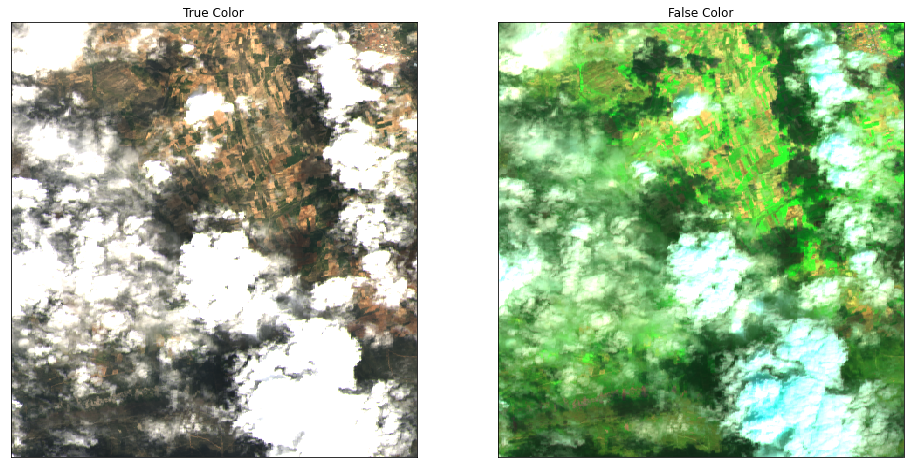

In [13]:
# MODIFY HERE

# Select one of the time slices and create an output image. 
# Clouds will be visible in WHITE for an output image

slice = 10  # select the time slice number here

# Select the output image bands
# Users can create other combinations of bands (loaded above), as desired
# True-Color = red, green, blue (this is the common true-color RGB image)
# False Color = swir2, nir, green (this is commonly used for Landsat data viewing)

true_rgb = ds.isel(time=slice)[['red', 'green', 'blue']].to_array()
false_rgb = ds.isel(time=slice)[['swir2', 'nir', 'green']].to_array()

# Define the plot settings and show the plots
# Users may want to alter the figure sizes or plot titles
# The "vmax" value controls the brightness of the images and can be adjusted 

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
true_rgb.plot.imshow(ax=ax[0], vmin=0, vmax=3000)
false_rgb.plot.imshow(ax=ax[1], vmin=0, vmax=5000)
ax[0].set_title('True Color'), ax[0].xaxis.set_visible(False), ax[0].yaxis.set_visible(False)
ax[1].set_title('False Color'), ax[1].xaxis.set_visible(False), ax[1].yaxis.set_visible(False)
plt.show()

Congratulations - you have loaded and plotted your first dataset with ODC and Colab! 

Now it's your turn to try having a play by going back and modifying some of the code blocks and running them again. Here are a couple of ideas:
 
*   [Click here](#modify_slice) to update the `slice` variable in the cell above to view a different time slice (e.g. try `slice = 8`). Use [shift] + [enter] to re-run that cell, and notice the change in clouds!
*   [Click here](#change_lat_lon) to enter a new Lat/Lon location, enter that in the block above the map, and then run successive code blocks to see the data from the region. (Tip: you can find the Lat/Lon in [Google Maps](https://maps.google.com/) by right clicking the map where you're interested and click the lat-long listed to copy it to the clipboard.)

[Back to the top](#top)

<a name="explore-applications"></a>
# 5. Publicly available ODC notebooks

We have also developed a number of application-specific notebooks to help users understand the capabilties of the ODC. To continue learning about the ODC choose one of the following notebooks and get started! We are continuously updating these to make them better and always value user feedback - if you have any comments please don't hesitate to get in touch (where...)!

You can find descriptions below, and the notebooks in this [GitHub repository folder](https://github.com/ceos-seo/odc-colab/tree/master/notebooks).

- **Cloud statistics (Landsat 8)** *Calculate cloud statistics for specific regions Landsat-8 data.*
  - <a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/02.01.Colab_Cloud_Statistics_L8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" height="16px" alt="Open In Colab"/></a>
  -[View on GitHub](https://github.com/ceos-seo/odc-colab/blob/master/notebooks/02.01.Colab_Cloud_Statistics_L8.ipynb)
- **Median mosaic (Landsat 8)** *Create a custom Landsat cloud-filtered median mosaic for any time period and location.*
  - <a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/02.03.Colab_Median_Mosaic_L8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" height="16px" alt="Open In Colab"/></a>
  -[View on GitHub](https://github.com/ceos-seo/odc-colab/blob/master/notebooks/02.03.Colab_Median_Mosaic_L8.ipynb)
- **Vegetation change (Landsat 8)** *Use changes in the Normalized Difference Vegetation Index (NDVI) to identify vegetation change.*
  - <a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/02.06.Colab_Vegetation_Change_L8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" height="16px" alt="Open In Colab"/></a>
  -[View on GitHub](https://github.com/ceos-seo/odc-colab/blob/master/notebooks/02.06.Colab_Vegetation_Change_L8.ipynb)
- **Water WOFS (Landsat 8)** *Demonstration of the Australian Water Observations from Space (WOFS) algorithm.*
  - <a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/02.04.Colab_Water_WOFS_L8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" height="16px" alt="Open In Colab"/></a>
  -[View on GitHub](https://github.com/ceos-seo/odc-colab/blob/master/notebooks/02.04.Colab_Water_WOFS_L8.ipynb)
- **Spectral Products (Landsat-8)** *Compute different spectral products created using mathematical combinations of specific spectral bands.*
  - <a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/02.05.Colab_Spectral_Products_L8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" height="16px" alt="Open In Colab"/></a>
  -[View on GitHub](https://github.com/ceos-seo/odc-colab/blob/master/notebooks/02.05.Colab_Spectral_Products_L8.ipynb)
- **Cloud statistics (Sentinel 2)** *Calculate cloud statistics for specific regions Sentinel-2 data.*
  - <a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/02.02.Colab_Cloud_Statistics_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" height="16px" alt="Open In Colab"/></a>
  -[View on GitHub](https://github.com/ceos-seo/odc-colab/blob/master/notebooks/02.02.Colab_Cloud_Statistics_S2.ipynb)
- **Vegetation Phenology (Landsat 8)** *Calculate vegetation phenology changes using Landsat 8 and Normalized Difference Vegetation Index (NDVI).*
  - <a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/02.07.Colab_Vegetation_Phenology_L8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" height="16px" alt="Open In Colab"/></a>
  -[View on GitHub](https://github.com/ceos-seo/odc-colab/blob/master/notebooks/02.07.Colab_Vegetation_Phenology_L8.ipynb)
- **Mission coincidences** *Find concident acquisition regions for three missions: Landsat-8, Sentinel-2 and Sentinel-1.*
  - <a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/02.09.Colab_Mission_Coincidences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" height="16px" alt="Open In Colab"/></a>
  -[View on GitHub](https://github.com/ceos-seo/odc-colab/blob/master/notebooks/02.09.Colab_Mission_Coincidences.ipynb)
- **Sentinel 1 data viewer** *View Sentinel-1 data over a specified region, including several different data products for single and multi-data analyses.*
  - <a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/02.08.Colab_S1_Data_Viewer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" height="16px" alt="Open In Colab"/></a>
  -[View on GitHub](https://github.com/ceos-seo/odc-colab/blob/master/notebooks/02.08.Colab_S1_Data_Viewer.ipynb)
- **VIIRS night lights** *Use nightlight radiance measurements from VIIRS to study urban growth and loss of power from storms.*
  - <a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/02.10.Colab_VIIRS_Night_Lights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" height="16px" alt="Open In Colab"/></a>
  -[View on GitHub](https://github.com/ceos-seo/odc-colab/blob/master/notebooks/02.10.Colab_VIIRS_Night_Lights.ipynb)

[Back to the top](#top)

<a name="reference-links"></a>
# 6. Reference Links

*Google Colab and Jupyter Notebooks*

* [What is Google Colab](https://colab.research.google.com/notebooks/intro.ipynb)
* [Introduction to the Jupyter Notebook Environment on Google Colab](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)
* [Description of Jupyter Notebooks from the Jupyter Project](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)
* [ODC-Colab Repository from the CEOS Systems Engineering Office](https://github.com/ceos-seo/odc-colab)
* [How to index new products on the ODC-Colab](https://github.com/ceos-seo/odc-gee#local-index)

*Open Data Cube*

* [What is the Open Data Cube?](https://medium.com/opendatacube/what-is-open-data-cube-805af60820d7)
* [opendatacube.org/](https://www.opendatacube.org)
* [github.com/opendatacube](https://github.com/opendatacube)
* [Open Earth Alliance](https://www.openearthalliance.org/)
* [User Forum](https://www.openearthalliance.org/forum)

*Open Data Cube Instances*

* [Digital Earth Australia](https://www.ga.gov.au/dea)
* [Digital Earth Africa](https://www.digitalearthafrica.org/)
* [Swiss Data Cube](https://www.swissdatacube.org/)

[Back to the top](#top)